In [3]:
import json
from pathlib import Path

import numpy as np


NUM_LAYERS = [5, 10, 15, 20, 25, 30, 35]
RHOBEGS = [0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3]
LAYERS_DIM = len(NUM_LAYERS)
RHOBEGS_DIM = len(RHOBEGS)

cuts_data = np.zeros((RHOBEGS_DIM, LAYERS_DIM))

data_path = Path(
    "C:/Users/levohad/ohad_work/qemc",
    "EXP_DATA",
    "ref_29_fig3b_comparison__iters_2000__layers_5to35__rhobeg_0.7to1.3",
    "graph_random_graph__p_0.660__density_0.65__seed_0",
    "backend_statevector_simulator"
)

with open(Path(data_path, "total_backend_configurations_metadata.json"), "r") as f:
          data = json.load(f)
          
for configuration_id, configuration_data in data["configurations"].items():
    int_id = int(configuration_id) - 1
    
    num_layers = configuration_data["setting"]["num_layers"]
    layer_id =  int_id // LAYERS_DIM
    assert num_layers == NUM_LAYERS[layer_id]
    x_col_layer_id = layer_id
          
          
    rhobeg = configuration_data["setting"]["optimization_options"]["rhobeg"]
    rhobeg_id = int_id % RHOBEGS_DIM
    assert rhobeg == RHOBEGS[rhobeg_id]
    y_row_rhobeg_id = RHOBEGS_DIM - 1 - rhobeg_id
          
    cuts_data[y_row_rhobeg_id, x_col_layer_id] = configuration_data["average_best_cut"]
          
cuts_data

array([[187.64, 188.88, 189.92, 188.84, 190.08, 189.84, 189.72],
       [188.16, 189.2 , 190.  , 189.28, 189.84, 190.48, 189.64],
       [187.  , 188.96, 189.36, 188.64, 190.44, 190.12, 190.64],
       [186.24, 189.6 , 189.68, 190.88, 189.36, 189.68, 191.64],
       [187.84, 188.48, 188.6 , 189.68, 189.2 , 190.28, 191.44],
       [188.84, 189.24, 189.72, 189.2 , 189.6 , 190.52, 191.48],
       [187.44, 190.48, 190.4 , 189.72, 189.56, 189.4 , 190.96]])

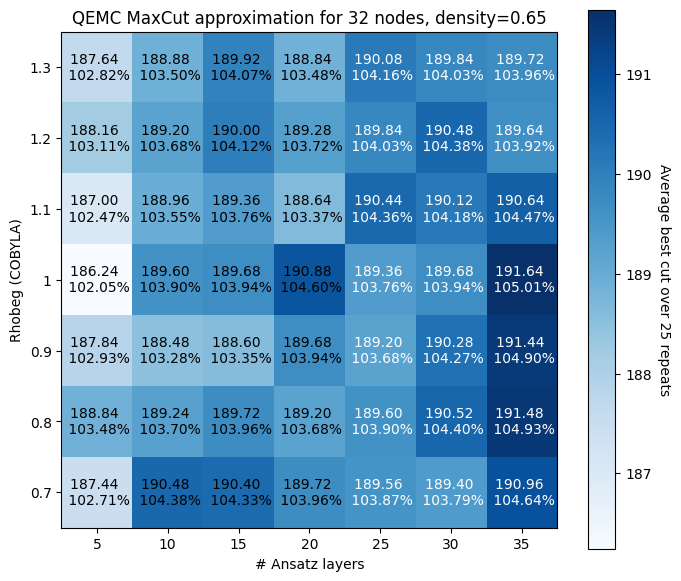

In [27]:
import matplotlib.pyplot as plt


ref29_cut = 182.49

# Create the plot
fig, ax = plt.subplots(figsize=(8,7))
im = ax.imshow(cuts_data, cmap="Blues")

# Create a colorbar to show the value scale
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Average best cut over 25 repeats", rotation=-90, va="bottom")

# Add the exact value as text on each tile
for row_id in range(RHOBEGS_DIM):
    for col_id in range(LAYERS_DIM):
        
        cut = cuts_data[row_id, col_id]
        relative_cut = cut / ref29_cut
        
        text = ax.text(
            col_id,
            row_id,
            f"{cut:.2f} \n {relative_cut * 100:.2f}%",
            ha="center",
            va="center",
            color="black" if col_id < 4 else "white",
        )

# Set labels and title
ax.set_title("QEMC MaxCut approximation for 32 nodes, density=0.65")
ax.set_xticks(range(LAYERS_DIM), NUM_LAYERS)
ax.set_yticks(range(RHOBEGS_DIM), reversed(RHOBEGS))
ax.set_xlabel("# Ansatz layers")
ax.set_ylabel("Rhobeg (COBYLA)")

plt.savefig(Path(data_path, "data_grid_search_plot.png"))
plt.show()